***************************************************************************************
we're going to take the following Approch:

1. Data Extraction
2. Data Analysis
3. Data Interpretation and Representation
4. Data Preprocessing
    * Data Cleaning
    * Feature Selection
    * Feature Scaling
    * Outlier Detection
5. Model Selection
6. Model Evaluation
7. Feature Importance



***************************************************************************************

In [1]:
#Importing required libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

#plot style use.
plt.style.use('seaborn')

#importing models.
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.api import ExponentialSmoothing,SimpleExpSmoothing,Holt

# Data Extraction

In [2]:
#Loading the data into dataframe.
df = pd.read_csv('gold_monthly_csv.csv')

#Having a look at the data.
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


# Data Analysis

In [3]:
#Having a look at the shape.
df.shape

(847, 2)

* As we can see, we have 847 rows and 2 columns.

In [4]:
#Having a look at the duplicate values.
df.drop_duplicates(keep = False,inplace = True)

In [5]:
#Now have a look at the shape.
df.shape

(847, 2)

* It means we don't have the duplicates.

In [6]:
#Having a look at the datatype.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    847 non-null    object 
 1   Price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 19.9+ KB


* Here it shows date in object format.

In [7]:
#Changing the date into datatime format.
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
#Now have a look at the info.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    847 non-null    datetime64[ns]
 1   Price   847 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.9 KB


* As we can see now our date column is in datetime format.

In [9]:
#Having a look at the missing values.
df.isna().sum()

Date     0
Price    0
dtype: int64

* We don't have the missing values inside our dataset.

In [10]:
df.head()

,Date,Price
0,1950-01-01,34.73
1,1950-02-01,34.73
2,1950-03-01,34.73
3,1950-04-01,34.73
4,1950-05-01,34.73


In [11]:
#Having a look at the Aggregations.
df.describe()

,Price
count,847.000000
mean,416.556906
std,453.665313
min,34.490000
25%,35.190000
50%,319.622000
75%,447.029000
max,1840.807000


* Here it's giving us count,mean,std,min,max values etc.

In [12]:
#Let's have a look at first date and last date.
print('Fist date: ',df['Date'].iloc[1])
print('Last date: ',df['Date'].iloc[-1])

Fist date:  1950-02-01 00:00:00
Last date:  2020-07-01 00:00:00


In [13]:
#Let's create date in month format.
date = pd.date_range(start = '1/1/1950',end= '8/1/2020',freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [14]:
#Append the date column inside the dataset as month.
df['Month'] = date

#Removing the date column.
df.drop('Date',axis = 1,inplace = True)

#Have a look at the data now.
df.head()

,Price,Month
0,34.73,1950-01-31
1,34.73,1950-02-28
2,34.73,1950-03-31
3,34.73,1950-04-30
4,34.73,1950-05-31


In [15]:
#Let's set month as index.
df.set_index('Month',inplace = True)

#Having a look at the data now.
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


# Data Interpretation and Representation.

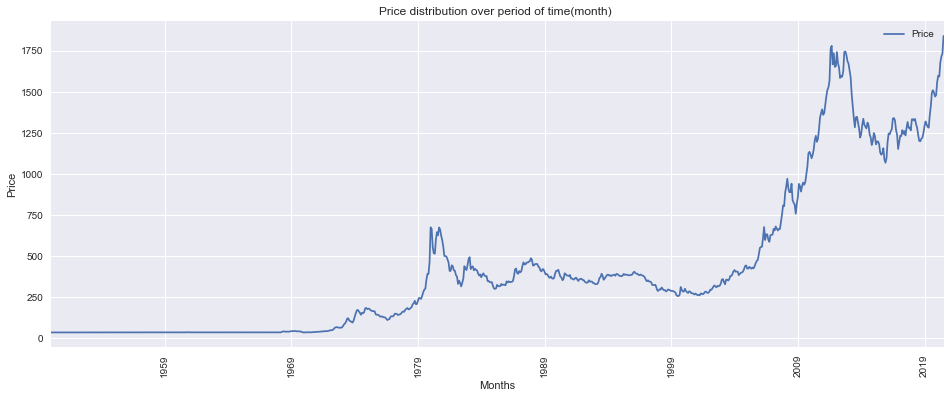

In [16]:
#Having a look at the visualization.
df.plot(kind = 'line',figsize = (16,6))
plt.title('Price distribution over period of time(month) ')
plt.xlabel('Months')
plt.ylabel('Price')
plt.xticks(rotation = 90);

* As we can see our gold price increasing over period of time.

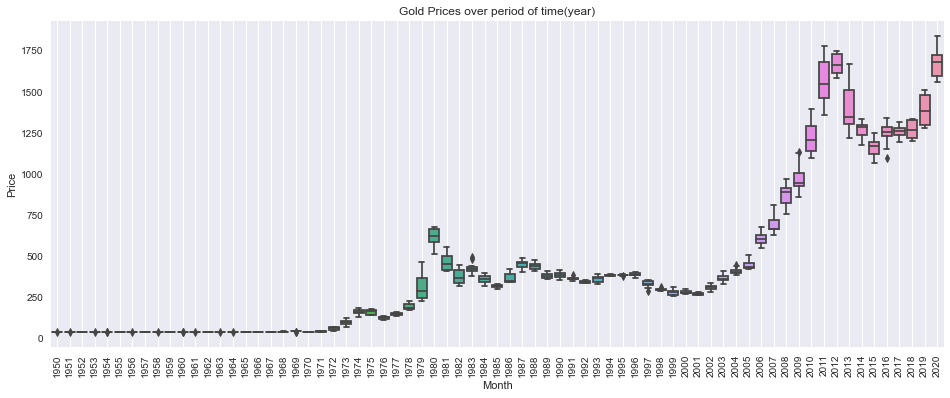

In [17]:
#Having a look at the box plot.
plt.figure(figsize = (16,6))
sns.boxplot(x = df.index.year,y = df['Price'])
plt.title('Gold Prices over period of time(year)')
plt.grid()
plt.xticks(rotation = 90);

* In this plot we can see, the min,max and median value of Gold Price in every year.

In [18]:
#let's see the min,max and median value of gold price in year 2020.
df[(df.index >= '2020-01-01') & (df.index <= '2020-12-01')].describe()

,Price
count,7.000000
mean,1674.830857
std,98.431766
min,1560.668000
25%,1596.291000
50%,1680.030000
75%,1724.864500
max,1840.807000


* Here we can see, the minimum,mean and maximum value of gold price in 2020.

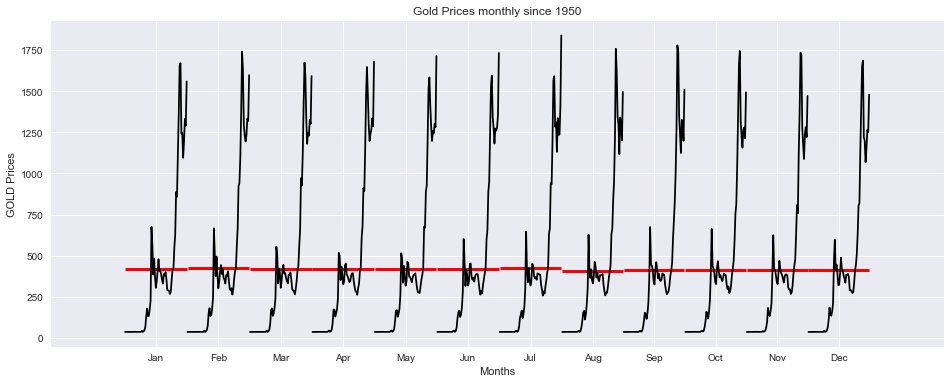

In [19]:
#importing month plot.
from statsmodels.graphics.tsaplots import month_plot

fig,ax = plt.subplots(figsize=(16,6))
month_plot(df,ax = ax)
plt.title('Gold Prices monthly since 1950')
plt.xlabel('Months')
plt.ylabel('GOLD Prices');

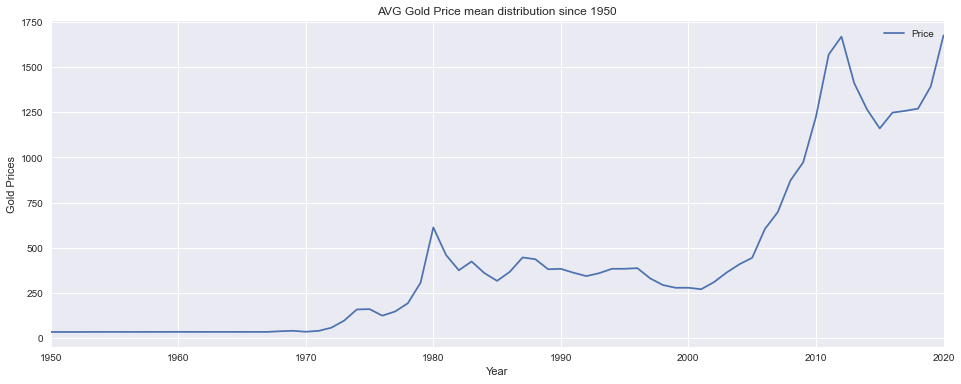

In [20]:
#Let's have a look at yearly distribution of AVG Gold Prices.
Yearly_mean_Gold_Prices = df.resample(rule= 'Y').mean()

#Visualization.
Yearly_mean_Gold_Prices.plot(figsize = (16,6))
plt.title('AVG Gold Price mean distribution since 1950')
plt.xlabel('Year')
plt.ylabel('Gold Prices');

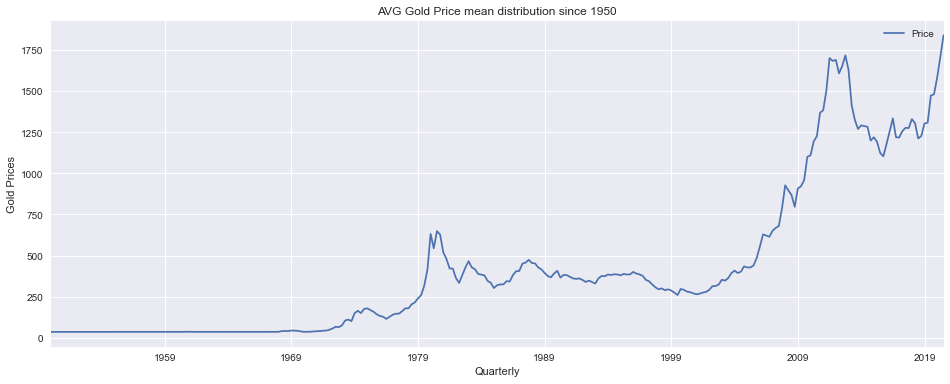

In [21]:
#Let's have a look at Quarterly distribution of AVG Gold Prices.
Quarterly_mean_Gold_Prices = df.resample(rule= 'Q').mean()

#Visualization.
Quarterly_mean_Gold_Prices.plot(figsize = (16,6))
plt.title('AVG Gold Price mean distribution since 1950')
plt.xlabel('Quarterly')
plt.ylabel('Gold Prices');

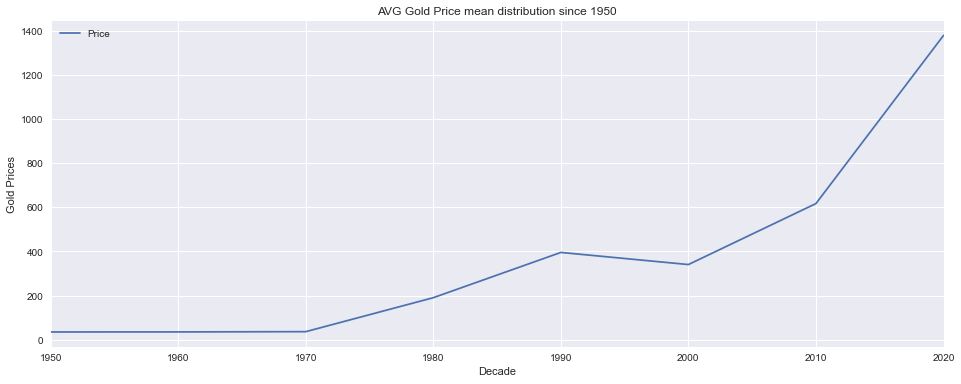

In [22]:
#Let's have a look at distribution of AVG Gold Prices after every 10Y.
Gold_Prices_over_decade = df.resample('10Y').mean()

#Visualization.
Gold_Prices_over_decade.plot(figsize = (16,6))
plt.title('AVG Gold Price mean distribution since 1950')
plt.xlabel('Decade')
plt.ylabel('Gold Prices');

# Data Preprocessing

In [23]:
df.head()

,Price
Month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [24]:
#let's create mean and std.
df_1 = df.groupby(df.index.year).mean()
df_1['STD'] = df.groupby(df.index.year).std()

#Renaming the columns.
df_1.columns = ['Mean','Std']

#Having a look at the data.
df_1.head()

,Mean,Std
Month,,
1950,34.729167,0.002887
1951,34.717500,0.020057
1952,34.628333,0.117538
1953,34.879167,0.056481
1954,35.020000,0.082792


In [25]:
#Let's create cov_pct.
df_1['COV_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)

#Having a look at the data.
df_1.head()

,Mean,Std,COV_pct
Month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


In [26]:
#let's split the data into train and test.
train_data = df[df.index.year <= 2015]
test_data = df[df.index.year > 2015]

In [27]:
#Having a look at the shape.
print(train_data.shape)
print(test_data.shape)

(792, 1)
(55, 1)


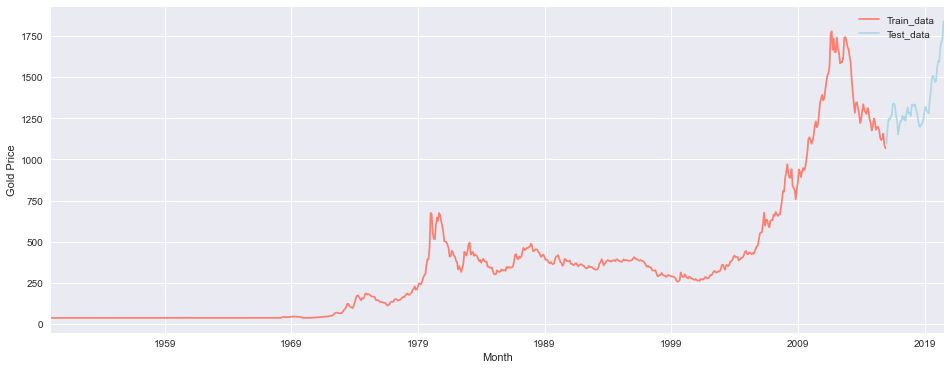

In [28]:
#Let's visualize this train test values.
plt.figure(figsize=(16,6))
train_data['Price'].plot(color = ('salmon'))
test_data['Price'].plot(color = ('lightblue'))
plt.legend(['Train_data','Test_data'])
plt.ylabel('Gold Price')
plt.show()

# Model Selection

In [29]:
#Creating time column in train and test data.
train_data['time'] = [i+1 for i in range(len(train_data))]
test_data['time'] = [i + len(train_data)+1 for i in range(len(test_data))]

In [30]:
#Initializing linear Regression.
lr =LinearRegression(n_jobs= -1)
lr.fit(train_data[['time']],train_data['Price'])

LinearRegression(n_jobs=-1)

# Model Evaluation

In [31]:
#Let's make predictions.
pred = lr.predict(test_data[['Price']])

#Adding pred column in test.
test_data['Forcast'] = pred

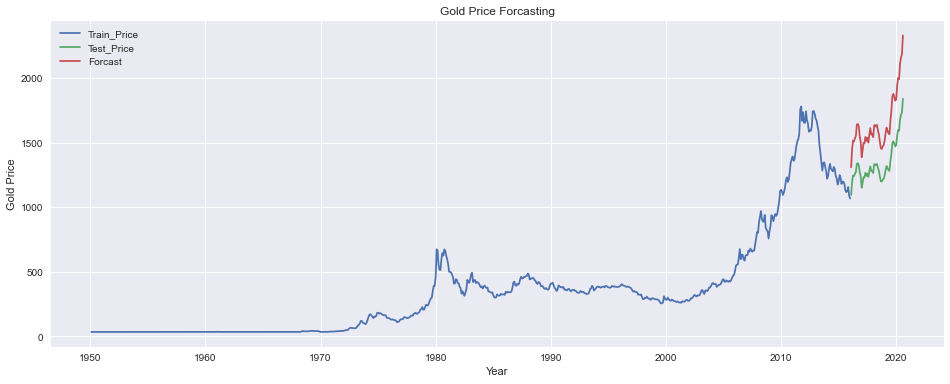

In [32]:
#Let's Visualize train price,test price and forcast.
fig,ax = plt.subplots(figsize = (16,6))
plt.plot(train_data['Price'])
plt.plot(test_data['Price'])
plt.plot(test_data['Forcast'])
plt.title('Gold Price Forcasting')
plt.legend(['Train_Price','Test_Price','Forcast'])
plt.xlabel('Year')
plt.ylabel('Gold Price');

In [33]:
#Let's check out mape(Measure the accuracy of predicted forcast).
def mape(actual,pred):
    return round((np.mean(abs(actual - pred)/actual))*100,2)

In [34]:
#Let's map the value and see the result.
mape_result_lr = mape(test_data['Price'],test_data['Forcast'])
mape_result_lr

22.59

In [35]:
#Final model.
final_model = ExponentialSmoothing(df,
                                  trend= 'additive',
                                  seasonal= 'additive').fit(smoothing_level= 0.4,
                                                          smoothing_trend=0.3,
                                                          smoothing_seasonal=0.6)

C:\Users\PRAJUBED\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


In [36]:
#Having a look at the mape result for final model.
mape_result_final = mape(df['Price'],final_model.fittedvalues)
mape_result_final

17.24

In [37]:
#Let's make forecasting.
pred_df = final_model.forecast(steps = len(test_data) + 50)

#Having a look at the forcast.
pred_df.head()

2020-08-31    1792.867721
2020-09-30    1723.449152
2020-10-31    1646.705839
2020-11-30    1584.891463
2020-12-31    1567.455865
Freq: M, dtype: float64

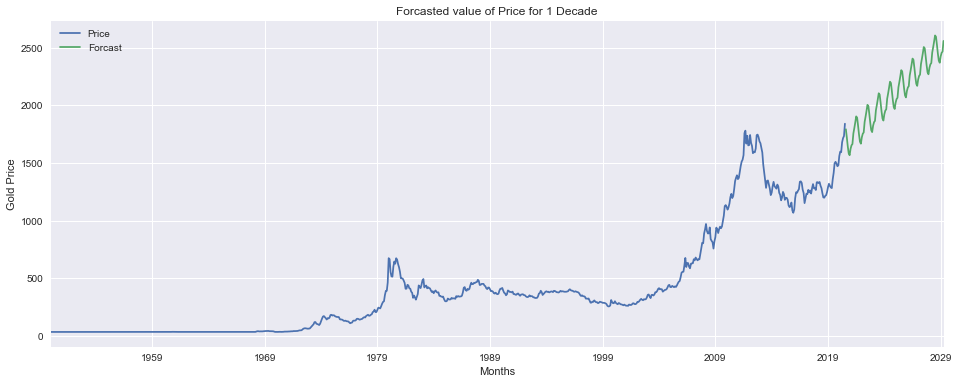

In [38]:
#let's visualize the forcasted value.
fig,ax = plt.subplots(figsize = (16,6))
df.plot(ax = ax)
pred_df.plot(ax=ax)
plt.title('Forcasted value of Price for 1 Decade')
plt.legend(['Price','Forcast'])
plt.xlabel('Months')
plt.ylabel('Gold Price');

* In this graph we can see the future forcasting of price and as we can see it showing upward trend.